# **TASK:**

1. Import the MobileNet model from Hugging Face (Must be directly from the Hugging Face model hub).

2. Modify the last few layers of the MobileNet model.

3. Load the FashionMNIST dataset.

4. Preprocess the data using appropriate transformations compatible with MobileNet.

5. Train the modified model for 5 epochs.

6. Evaluate the model:
   - Print training and validation accuracy and loss.
   - Plot the confusion matrix.

# **Used the below code, you will get an error during training related to Load the dataset and transformation. Your task to resolve that errors and train this modified model on FashionMNIST dataset**

## **ChatGPT Prompt**

I am doing image classification python project. Give me complete python code in which first they load the mobilenet model from the huggingface and modified the last layers of mobilenet by adding few layers and for 10 class classification. Then load the fashionMNIST dataset and apply the transformation so I will train my modified model on this dataset. Using 5 epoch and train the network and print the accuracy and loss. Also print the confusion matrix.

# **Install necessary libraries**

In [ ]:
!pip install torch torchvision transformers datasets huggingface_hub matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Importing the required libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import DataLoader
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torchvision.models as models

# **Load the model from hugging face for image classification**

In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
processor = AutoImageProcessor.from_pretrained("google/mobilenet_v2_1.0_224")
model = AutoModelForImageClassification.from_pretrained("google/mobilenet_v2_1.0_224")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

## **Steps to resolve the above error**
If GPT give you the above cell code, then you will get this error. To resolve this problem (ask GPT to import the mobilenet model from huggingface), follow these steps:

1. Go to the Hugging Face website.

2. Create an account if you don’t have one:
   - Provide a username, email, and password.
   - Click Sign Up.

3. Verify your email address by clicking the link sent to your inbox.

4. Search for the model you want in the Models section.
  - Example: Type "mobilenet" or "mobilenetv2" in the search bar.

5. You will get the below transformer code of mobilenet.

## **Transformer and Pipeline Code**
from transformers import pipeline

pipe = pipeline("image-classification", model="google/mobilenet_v2_1.0_224")

The pipeline is a high-level API meant for inference only. It hides the internal model details and does not allow modifications. So, we cannot use this to modify the layers of the model. We will modify the layers using the below code only from huggingface.

In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification, TrainingArguments, Trainer, pipeline

processor = AutoImageProcessor.from_pretrained("google/mobilenet_v2_1.0_224")
model = AutoModelForImageClassification.from_pretrained("google/mobilenet_v2_1.0_224")

# Print model architecture
print(model)

MobileNetV2ForImageClassification(
  (mobilenet_v2): MobileNetV2Model(
    (conv_stem): MobileNetV2Stem(
      (first_conv): MobileNetV2ConvLayer(
        (convolution): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (normalization): BatchNorm2d(32, eps=0.001, momentum=0.997, affine=True, track_running_stats=True)
        (activation): ReLU6()
      )
      (conv_3x3): MobileNetV2ConvLayer(
        (convolution): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), groups=32, bias=False)
        (normalization): BatchNorm2d(32, eps=0.001, momentum=0.997, affine=True, track_running_stats=True)
        (activation): ReLU6()
      )
      (reduce_1x1): MobileNetV2ConvLayer(
        (convolution): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (normalization): BatchNorm2d(16, eps=0.001, momentum=0.997, affine=True, track_running_stats=True)
      )
    )
    (layer): ModuleList(
      (0): MobileNetV2InvertedResidual(
        (expand_1x1): MobileNe

# **Modify the layers**

In [ ]:
class ModifiedMobileNetV2(nn.Module):
    def __init__(self, original_model, num_classes=10):
        super(ModifiedMobileNetV2, self).__init__()

        # Remove the original classifier
        self.base_model = original_model.mobilenet_v2  # Feature extractor

        # ✅ Global Average Pooling (GAP) layertorch.Size([1, 224, 224])
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)

        # Custom fully connected layers
        self.fc1 = nn.Linear(1280, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.base_model(x).last_hidden_state # Get feature maps
        x = self.global_avg_pool(x)  # Apply GAP
        x = torch.flatten(x, 1)  # Flatten the output for FC layer
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Create modified model
modified_model = ModifiedMobileNetV2(model, num_classes=10)
print(modified_model)

ModifiedMobileNetV2(
  (base_model): MobileNetV2Model(
    (conv_stem): MobileNetV2Stem(
      (first_conv): MobileNetV2ConvLayer(
        (convolution): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (normalization): BatchNorm2d(32, eps=0.001, momentum=0.997, affine=True, track_running_stats=True)
        (activation): ReLU6()
      )
      (conv_3x3): MobileNetV2ConvLayer(
        (convolution): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), groups=32, bias=False)
        (normalization): BatchNorm2d(32, eps=0.001, momentum=0.997, affine=True, track_running_stats=True)
        (activation): ReLU6()
      )
      (reduce_1x1): MobileNetV2ConvLayer(
        (convolution): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (normalization): BatchNorm2d(16, eps=0.001, momentum=0.997, affine=True, track_running_stats=True)
      )
    )
    (layer): ModuleList(
      (0): MobileNetV2InvertedResidual(
        (expand_1x1): MobileNetV2ConvLayer(
  

# **Load the dataset and apply transformation**

In [ ]:
# Load FashionMNIST from Hugging Face
dataset = load_dataset("fashion_mnist")

README.md:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/5.18M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
# Define transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Repeat grayscale 3 times to create 3 channels
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize for 3 channels
])

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, hf_dataset, transform):
        self.dataset = hf_dataset
        self.transform = transform

    def __getitem__(self, idx):
        image = self.dataset[idx]['image']
        label = self.dataset[idx]['label']
        image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.dataset)

# Create Dataloaders
train_dataset = CustomDataset(dataset['train'], transform)
test_dataset = CustomDataset(dataset['test'], transform)

In [ ]:
train_dataset[0]

(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]),
 9)

In [ ]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

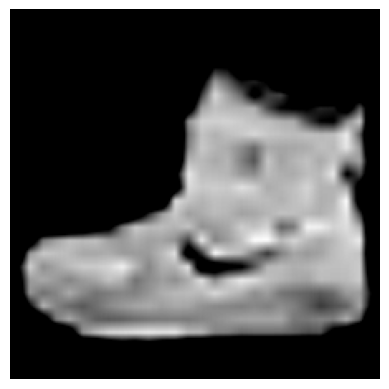

In [ ]:
# Lets display the first image in dataset
# Assuming train_dataset[0][0] contains the image tensor
image_tensor = train_dataset[0][0]

# Permute the dimensions to move the channel dimension to the last
image_tensor = image_tensor.permute(1, 2, 0)

# Display the image
plt.imshow(image_tensor)  # No need for cmap='gray' for color images
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# **Training Setup**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modified_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modified_model.parameters(), lr=0.001)

In [ ]:
num_epochs=5
# Loop through each epoch
for epoch in range(num_epochs):
    # Set the model to training mode
    modified_model.train()
    total_loss = 0
    correct = 0
    total = 0

    # Iterate over batches in the training data loader
    for batch in train_loader:
        # Accessing image and label from the tuple
        images, labels = batch  # batch is a tuple of (image, label)
        images = images.to(device)  # Move images to the specified device (CPU or GPU)
        labels = labels.to(device)  # Move labels to the specified device

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = modified_model(images)
        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()

        # Accumulate the total loss for the epoch
        total_loss += loss.item()
        # Get the index of the max log-probability
        _, predicted = outputs.max(1)
        # Count the number of correct predictions
        correct += (predicted == labels).sum().item()
        # Count the total number of samples in the batch
        total += labels.size(0)

    # Calculate the accuracy for the current epoch
    accuracy = 100 * correct / total
    # Print the loss and accuracy for the current epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Print message indicating training is complete
print("Training complete!")

Epoch [1/5], Loss: 699.3942, Accuracy: 87.19%
Epoch [2/5], Loss: 498.0760, Accuracy: 90.83%
Epoch [3/5], Loss: 431.9426, Accuracy: 92.03%
Epoch [4/5], Loss: 385.5075, Accuracy: 92.89%
Epoch [5/5], Loss: 353.4066, Accuracy: 93.51%
Training complete!


In [ ]:
# Set the model to evaluation mode
modified_model.eval()
# Initialize lists to store true labels and predicted labels
all_labels = []
all_preds = []

# Disable gradient calculation for inference
with torch.no_grad():
    # Iterate over batches in the test data loader
    for batch in test_loader:
        images, labels = batch  # Accessing image and label from the tuple
        images = images.to(device)  # Move images to device
        labels = labels.to(device)  # Move labels to device

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = modified_model(images)
        # Get the predicted class by finding the index of the maximum output
        _, preds = torch.max(outputs, 1)

        # Extend the lists with the true labels and predicted labels from the current batch
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

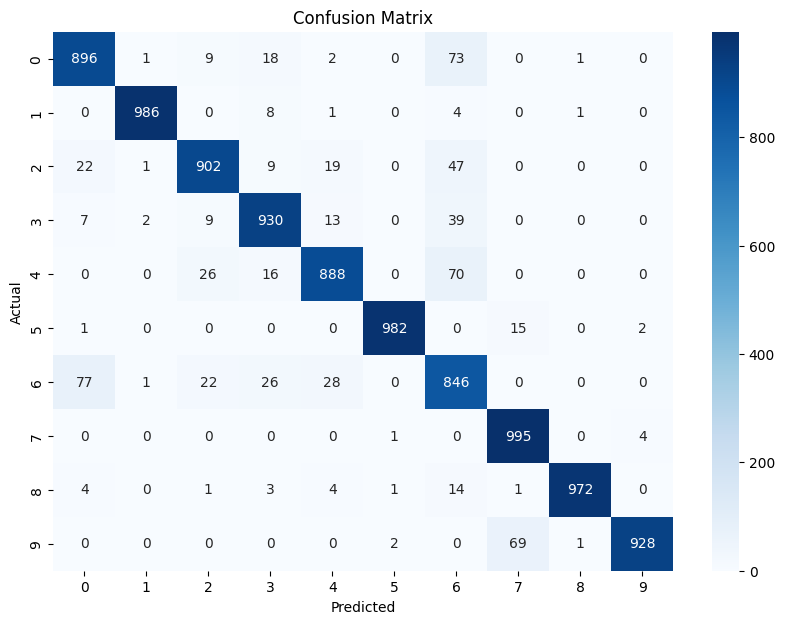

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Ensure class names are available
class_names = train_dataset.classes if hasattr(train_dataset, 'classes') else [str(i) for i in range(len(set(all_labels)))]

# Validate confusion matrix size
num_classes = len(class_names)
assert cm.shape == (num_classes, num_classes), f"Confusion matrix shape {cm.shape} does not match number of classes {num_classes}"

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Calculating Precision, Recall and F1 score of this model on FashionMNIST
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9347972818076554
Recall: 0.9325
F1 Score: 0.9331381229667657


In [ ]:
# Lets see the predicted class of the image we displayed before

# Make sure the model is in evaluation mode
modified_model.eval()

# Get the image and label
image, label = train_dataset[0]

# Add a batch dimension (MobileNet expects a batch)
image = image.unsqueeze(0)

# Move the image to the device
image = image.to(device)

# Perform the prediction
with torch.no_grad():
    outputs = modified_model(image)
    _, predicted = torch.max(outputs, 1)

print(f"Predicted class: {predicted.item()}")
print(f"Actual class: {label}")


Predicted class: 9
Actual class: 9
